# Limpeza do dataset: "Suicide Rates & Socioeconomic Factors (1990 - 22)"
### Autor: José Ivo, Marina e Carol

#### Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Baixando e escolhendo as Bases de Dados



Encontramos duas bases de dados nessa situação: "suicide_rates_1990-2022.csv" e "age_std_suicide_rates_1990-2022.csv". Baixaremos as duas para que possamos ver as diferenças entre elas.

In [ ]:
df = pd.read_csv("suicide_rates_1990-2022.csv")
df2 = pd.read_csv("age_std_suicide_rates_1990-2022.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118560 entries, 0 to 118559
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   RegionCode                    118560 non-null  object 
 1   RegionName                    118560 non-null  object 
 2   CountryCode                   118560 non-null  object 
 3   CountryName                   118560 non-null  object 
 4   Year                          118560 non-null  int64  
 5   Sex                           118560 non-null  object 
 6   AgeGroup                      118560 non-null  object 
 7   Generation                    118560 non-null  object 
 8   SuicideCount                  118096 non-null  float64
 9   CauseSpecificDeathPercentage  114271 non-null  float64
 10  DeathRatePer100K              107896 non-null  float64
 11  Population                    112640 non-null  float64
 12  GDP                           111320 non-nul

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

Observe que o primeiro DataFrame tem um número bem maior de registros, além de ser mais completo: ele possui informações a respeito das idades e da geração de cada pessoa. Por isso, analisaremos apenas o primeiro DataFrame.

### Analisando ausência de variáveis

Para termos uma noção melhor dos dados faltantes, veremos os valores ausentes por coluna.

In [ ]:
print(df.isnull().sum())

RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


Geramos o gráfico a seguir para visualizar a representação em porcentagem dos valores faltantes

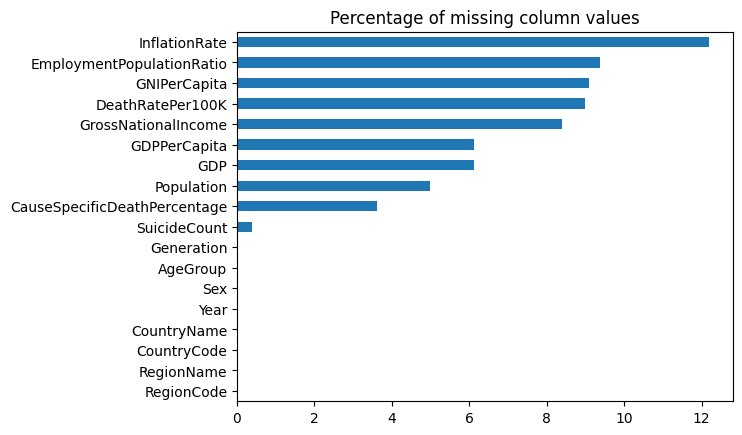

In [ ]:


# Calculate the percentage of missing values in each column
missing_percent_threshold = 20
missing_percentages = df.isna().sum() * 100 / len(df)
missing_percentages = round(missing_percentages, 2)

# Sort missing percentages in descending order
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

# Plot a bar chart showing the percentage of missing values for each column
missing_percentages_sorted.plot(kind='barh', title="Percentage of missing column values")

# Drop columns with missing value percentage exceeding the threshold
for column, missing_percentage in missing_percentages_sorted.items():
    if missing_percentage > missing_percent_threshold:
        df.drop(columns=column, inplace=True)



### Mapa de correlação das variáveis

Analisamos o mapa de calor das correlações entre variáveis para avaliar a proporcionalidade entre os valores, nos ajudando a encontrar colunas com informações redundantes

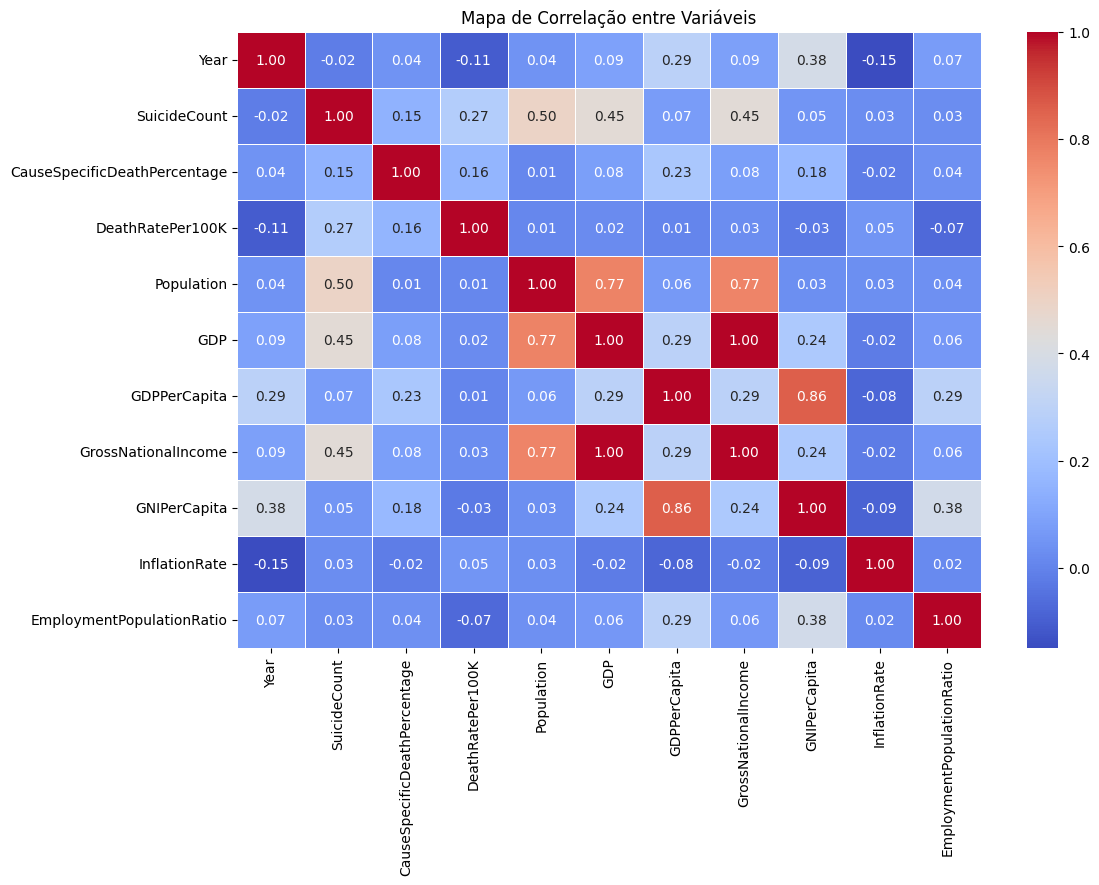

In [ ]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Correlação entre Variáveis")
plt.show()


### Removendo valores

Esses são os valores ausentes por coluna:

In [ ]:
print(df.isnull().sum())


RegionCode                          0
RegionName                          0
CountryCode                         0
CountryName                         0
Year                                0
Sex                                 0
AgeGroup                            0
Generation                          0
SuicideCount                      464
CauseSpecificDeathPercentage     4289
DeathRatePer100K                10664
Population                       5920
GDP                              7240
GDPPerCapita                     7240
GrossNationalIncome              9960
GNIPerCapita                    10760
InflationRate                   14460
EmploymentPopulationRatio       11120
dtype: int64


Removendo as duplicatas

In [ ]:
df = df.drop_duplicates()


O GNI traz informações muito semelhantes ao GDP (PIB), então sua remoção não trará grandes impactos ao nosso dataset. O mesmo vale para GNIPerCapita.

Quanto a coluna "Generation", encontramos irregularidades nos cálculos, por exemplo: grupos de criança da década de 90 estavam sendo dadas como Geração Z, pois apenas a idade estava sendo considerada. Portanto, removemos essa coluna.

Por fim, removemos todas as linhas que tivessem o SuicideCount nulo, pois consideramos a presença desse valor essencial para nossa análise.

In [ ]:
df = df.drop('GrossNationalIncome', axis=1)
df = df.drop('GNIPerCapita', axis=1)
df = df.drop('Generation', axis=1)
df = df.dropna(subset = 'SuicideCount')

Para termos uma melhor noção da interseção entre as variáveis faltantes, fizemos o seguinte gráfico:

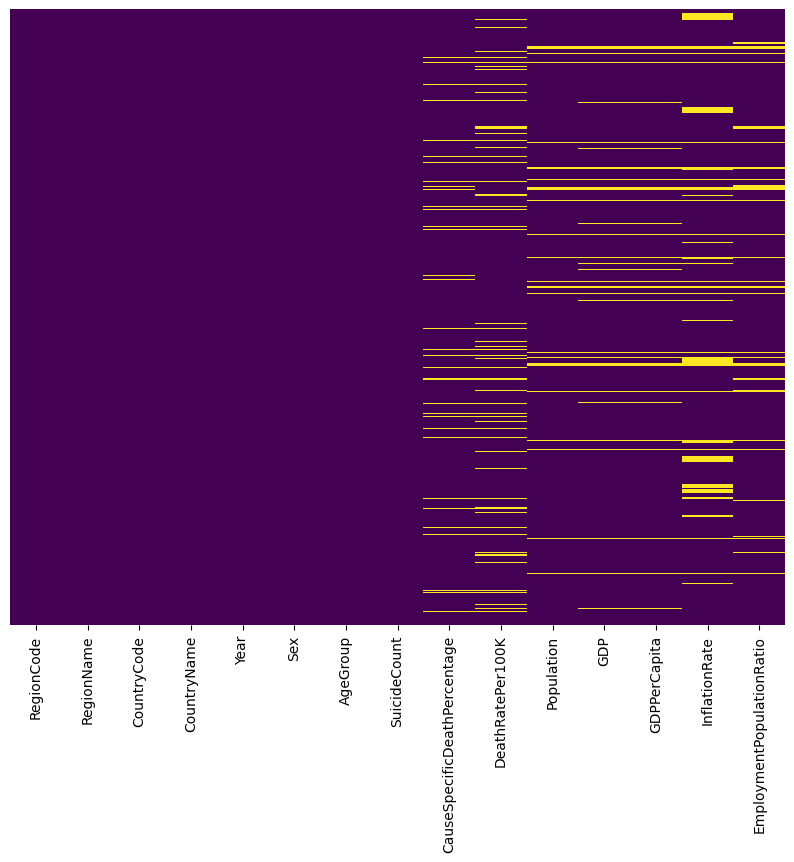

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

Podemos observar que as variáveis Population, GDP, GDPPerCapita, InflationRate e EmploymentPopulationRatio geralmente estão faltantes nas mesmas linhas. Portanto, decidimos dropar essas linhas, pois esses valores são essenciais para realizar a análise socioeconômica da análise.

In [ ]:
df = df.dropna(subset=['Population', 'GDP', 'GDPPerCapita', 'InflationRate', 'EmploymentPopulationRatio'], how='all')

Por fim, temos os seguintes valores faltantes por coluna:

In [ ]:
print(df.isnull().sum())

RegionCode                         0
RegionName                         0
CountryCode                        0
CountryName                        0
Year                               0
Sex                                0
AgeGroup                           0
SuicideCount                       0
CauseSpecificDeathPercentage    3364
DeathRatePer100K                7628
Population                         0
GDP                             1186
GDPPerCapita                    1186
InflationRate                   7261
EmploymentPopulationRatio       2146
dtype: int64


### Inputando dados faltantes

Como vimos que o GDP é um fator socioeconômico muito relevante para a análise, resolvemos ao invés de remover os valores nulos, substituí-los pela média geral de cada país.

In [ ]:
df.loc[:, ['GDPPerCapita', 'GDP']] = df.groupby('CountryCode')[['GDPPerCapita', 'GDP']].transform(lambda x: x.fillna(x.mean()))

### Visualizando a padronização das colunas

#### Dados econômicos

Um ponto importante é ver se os dados que estão em uma mesma coluna estão padronizados. Isso se torna mais importante nas colunas que tratam de valores financeiros, pois a moeda utilizada deve ser a mesma para todos os valores.

Vimos que a fonte dos dados econômicos da base é o World Bank, instituição que usa dólares por padrão em seus dados, portanto esse ajuste não foi necessário.

#### Gênero

Outra possibilidade de inconsistência seria o uso de mais de um rótulo para o mesmo sexo, exemplo: Man e Male para o sexo masculino.


In [ ]:
df["Sex"].value_counts()

,count
Sex,
Male,46379
Female,43829
Unknown,987


A partir disso, podemos ver que esse tipo de irregularidade não ocorre nessa base de dados.

# Ajuda baiano

O que fazer com dados do tipo "Unknown" em Sex e Age group

O que fazer com o resto dos dados faltantes
Exemplo: Argentina e Turcomenistão não possuem nenhum valor na coluna InflationRate, de modo que não podemos fazer a média para inputar esses dados